In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation 
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.python.keras.utils import np_utils


In [4]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')


In [5]:
import pandas as pd
data = pd.read_csv("DataSet_Signal.csv")

In [6]:
# первые строки таблицы
data.head(n=3)

,label,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,...,sample76,sample77,sample78,sample79,sample80,sample81,sample82,sample83,sample84,sample85
0,615,537.90,1647.9,396.92,97.252,81.320,86.279,941.60,1594.7,253.86,...,226.210,1471.8,985.31,40.706,20.248,81.615,297.470,1581.6,672.33,143.850
1,615,212.90,1657.5,1134.00,91.082,151.400,55.902,434.19,1804.9,907.44,...,83.217,1016.1,1744.10,121.200,40.012,31.064,81.615,1394.2,1494.40,53.085
2,615,105.22,1385.6,1053.30,125.210,18.248,51.856,265.71,1512.6,749.35,...,51.624,875.4,1556.00,189.560,69.116,63.159,76.164,1134.3,1245.20,90.609


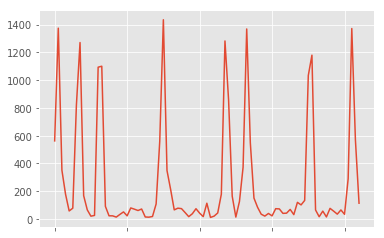

In [7]:
# вид сигнала сквок
data.iloc[7000,1:].plot();

In [8]:
# разделяем предикторы и отклик
Y_data = data['label'] # идентификатор сигнала сквока
X_data = data.drop(['label'], axis=1)  # сигнал сквока


In [9]:
# замена предикторов в виде номеров сквока на порядковый номер
nr_classes = 22; # количество классов (номеров сквоков) в наборе данных
n_squawk = 2000; # количество сигналов сквоков одного класса

num = np.zeros((n_squawk*nr_classes,))
tmp = np.ones((n_squawk, ))
for i in range(0,nr_classes):
    num[(i*n_squawk):((i+1)*n_squawk),] = tmp*(i)

Y_dataN = num # массив предикторов, состоящий из порядковых номера


In [10]:
# разделение на обучающую и тестовую выборку
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, Y_train, Y_test = train_test_split(X_data.values, Y_dataN, 
                                                  test_size=0.1, 
                                                  random_state=42)


In [11]:
# обучающая выборка
X_train_flt = X_train.astype('float32')
Y_train_flt = Y_train.astype('float32')
# тестовая выборка
X_test_flt = X_test.astype('float32')
Y_test_flt = Y_test.astype('float32')


In [12]:
# нормировка входных значений
X_train_norm = (X_train_flt.T[:,:] - X_train_flt.T[:,:].mean())/ X_train_flt.T[:,:].std()
X_test_norm = (X_test_flt.T[:,:] - X_test_flt.T[:,:].mean())/ X_test_flt.T[:,:].std()

X_train_norm = X_train_norm.T
X_test_norm = X_test_norm.T


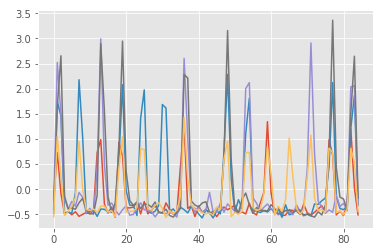

In [13]:
plt.plot(X_train_norm[0:5,0:85].T);

In [14]:
# бинарное кодирование предикторов
Y_train_bin = np_utils.to_categorical(Y_train_flt, nr_classes) 
Y_test_bin = np_utils.to_categorical(Y_test_flt, nr_classes)


In [15]:
# структура сети
model = Sequential()
model.add(Dense(8, input_shape=(85,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nr_classes))
model.add(Activation('softmax'))


In [16]:
model.summary() # описание модели

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 688       
_________________________________________________________________
activation (Activation)      (None, 8)                 0         
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 22)                198       
_________________________________________________________________
activation_1 (Activation)    (None, 22)                0         
Total params: 886
Trainable params: 886
Non-trainable params: 0
_________________________________________________________________


In [17]:
# параметры обучения
model.compile(loss = 'categorical_crossentropy', 
              optimizer = Adam(),
              metrics = ['accuracy'])


In [18]:
# параметры сети
np.random.seed(1337)  
batch_size = 10 
nr_iterations = 3 

net_res_1 = model.fit(X_train_norm, Y_train_bin, 
                      batch_size = batch_size, epochs = nr_iterations, 
                      verbose = 1, 
                      validation_data = (X_test_norm, Y_test_bin))                         


Train on 39600 samples, validate on 4400 samples
Epoch 1/3
39600/39600 [==============================] - 10s 248us/step - loss: 1.8631 - acc: 0.3461 - val_loss: 0.4360 - val_acc: 0.9984
Epoch 2/3
39600/39600 [==============================] - 9s 220us/step - loss: 1.4779 - acc: 0.4655 - val_loss: 0.2878 - val_acc: 0.9998
Epoch 3/3
39600/39600 [==============================] - 8s 213us/step - loss: 1.4214 - acc: 0.4919 - val_loss: 0.2360 - val_acc: 1.0000


In [19]:
predictions = model.predict(X_test_norm) 
score = model.evaluate(X_test_norm, Y_test_bin, verbose = 0)
print(score)


[0.2359916761788455, 1.0]


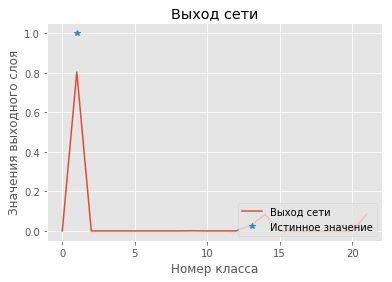

In [26]:
# выход сети
n_ind = 8; # номер выборки
plt.title('Выход сети')
plt.plot(range(0,22), predictions[n_ind,0:], label = 'Выход сети')
plt.plot(Y_test_flt[n_ind,], 1 , '*', label = 'Истинное значение')
plt.legend(loc = 'lower right')
plt.ylabel('Значения выходного слоя')
plt.xlabel('Номер класса');